In [1]:
# apply Jupyter notebook style
from IPython.core.display import HTML

from custom.styles import style_string

HTML(style_string)


# Introduction to Data Fitting with SciKitLearn

<div class="overview admonition"> 
<p class="admonition-title">Overview</p>

Questions:

* Question 1

Objectives:

* Fit a linear model using SciKitLearn.

</div>

In [2]:
import numpy as np

from rdkit import Chem
from rdkit.Chem import Descriptors

nat20_sdf = Chem.SDMolSupplier("data/amino_acids/amino_acids-nat20.sdf", strictParsing=False)
    
nat20_mols = list(nat20_sdf)

In [12]:
data_set = {"name":[], "molecular weight": [], "num heavy atoms":[] }

names = np.empty([20, 1], dtype=str)
molecular_weights = np.empty([20, 1])
num_heavy_atoms = np.empty([20, 1])

for i, mol in enumerate(nat20_mols):
    mol_name = mol.GetProp('_Name')
    mol_wt = Descriptors.MolWt(mol)
    heavy_atoms = Descriptors.HeavyAtomCount(mol)
    
    names[i] = mol_name
    molecular_weights[i] = heavy_atoms
    num_heavy_atoms[i] = mol_wt

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Molecular Weight')

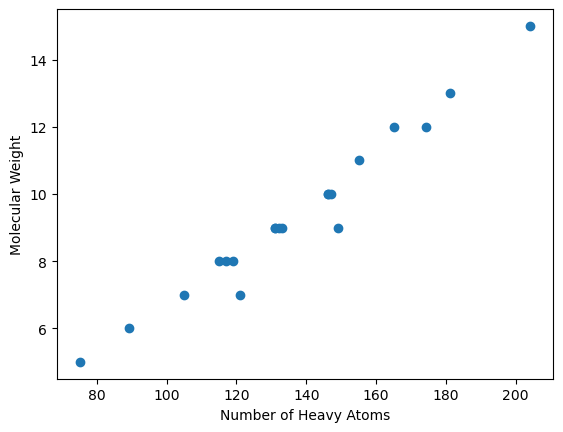

In [14]:
plt.scatter(num_heavy_atoms, molecular_weights)
plt.xlabel("Number of Heavy Atoms")
plt.ylabel("Molecular Weight")

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linear_model = LinearRegression()
linear_model.fit(num_heavy_atoms, molecular_weights)

LinearRegression()

In [18]:
linear_model.score(num_heavy_atoms, molecular_weights)

0.963306473431153

In [19]:
# use the model to make predictions and add it to the graph
model_values = linear_model.predict(num_heavy_atoms)

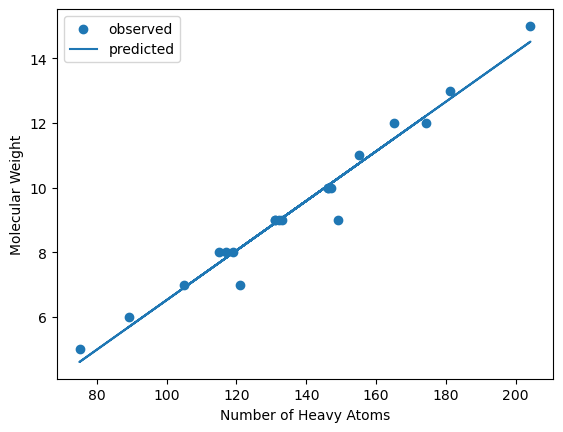

In [21]:
plt.scatter(num_heavy_atoms, molecular_weights, label="observed")
plt.plot(num_heavy_atoms, model_values, label="predicted")
plt.xlabel("Number of Heavy Atoms")
plt.ylabel("Molecular Weight")
plt.legend()

In [1]:
# Train test split